In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="HtSrnfhDjQBex2xFS2wZ")
project = rf.workspace("arul").project("screw-and-bolt-nwp0z")
version = project.version(3)
dataset = version.download("yolov8")

In [5]:
!pip install -U ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.70 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.1/107.7 GB disk)


In [6]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data=/content/Screw-and-Bolt--3/data.yaml epochs=25 imgsz=640 plots=True

100% 21.5M/21.5M [00:00<00:00, 251MB/s]
Ultralytics YOLOv8.2.70 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Screw-and-Bolt--3/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_c

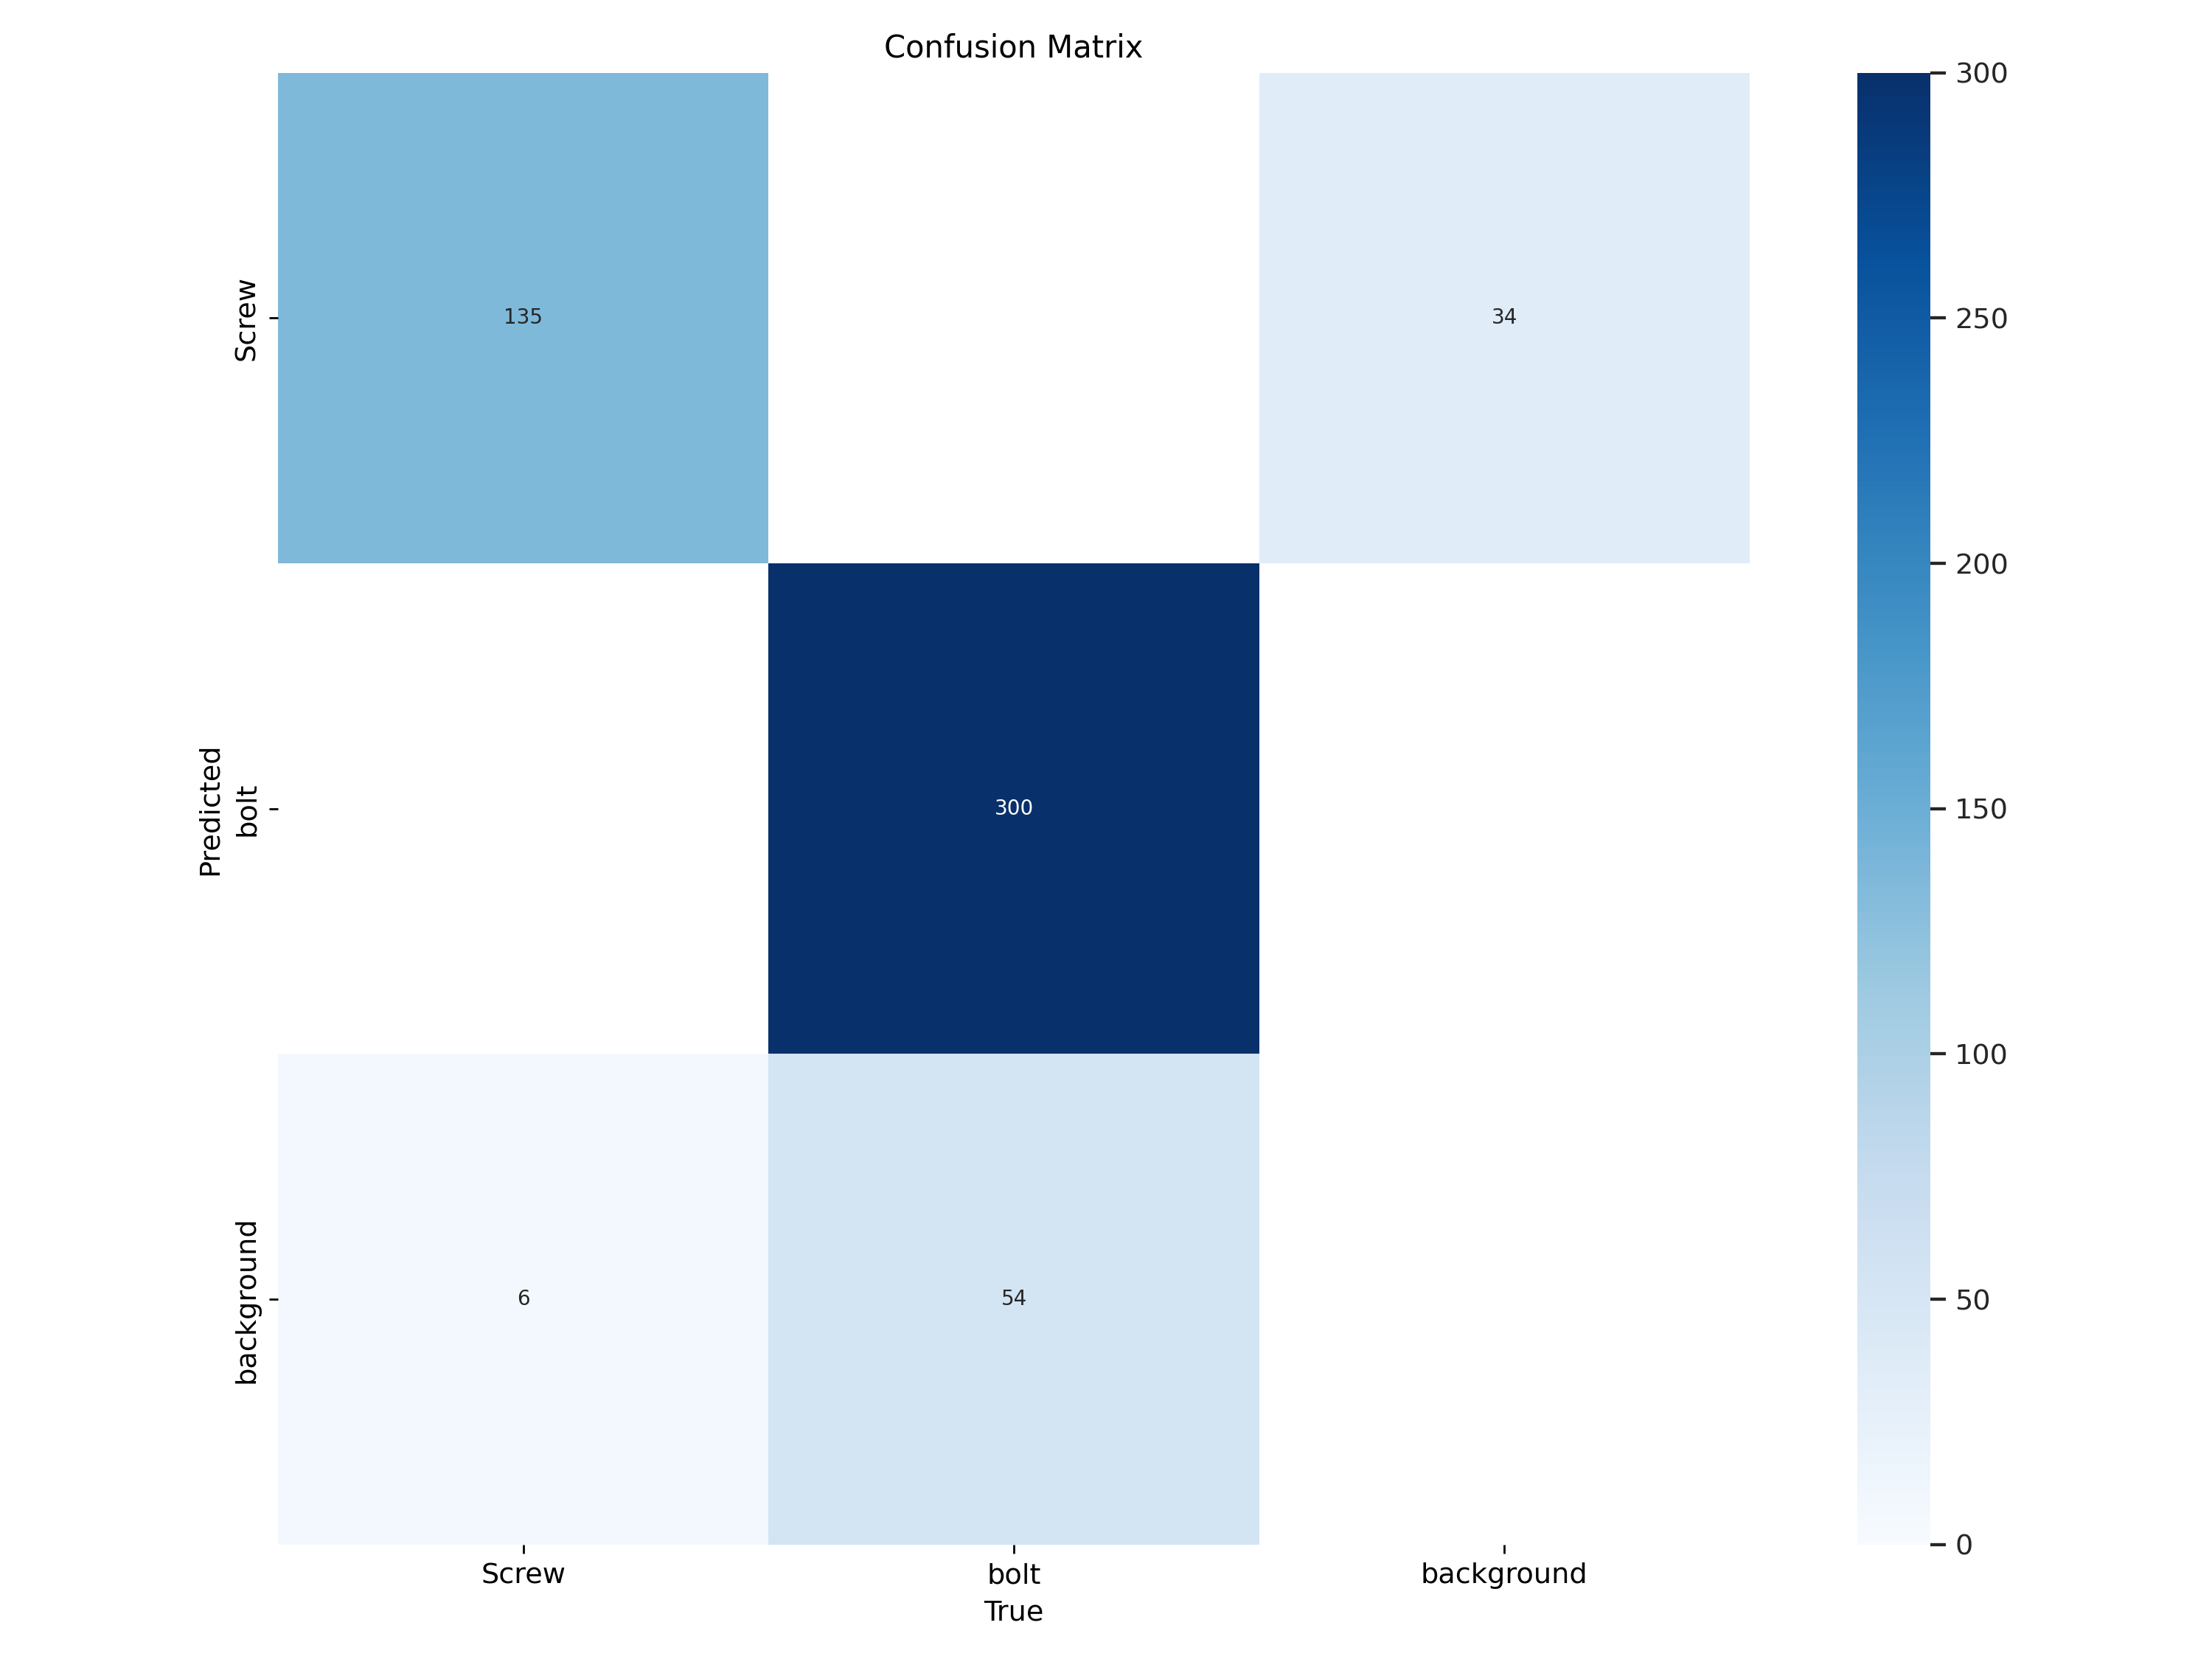

In [ ]:
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=600)

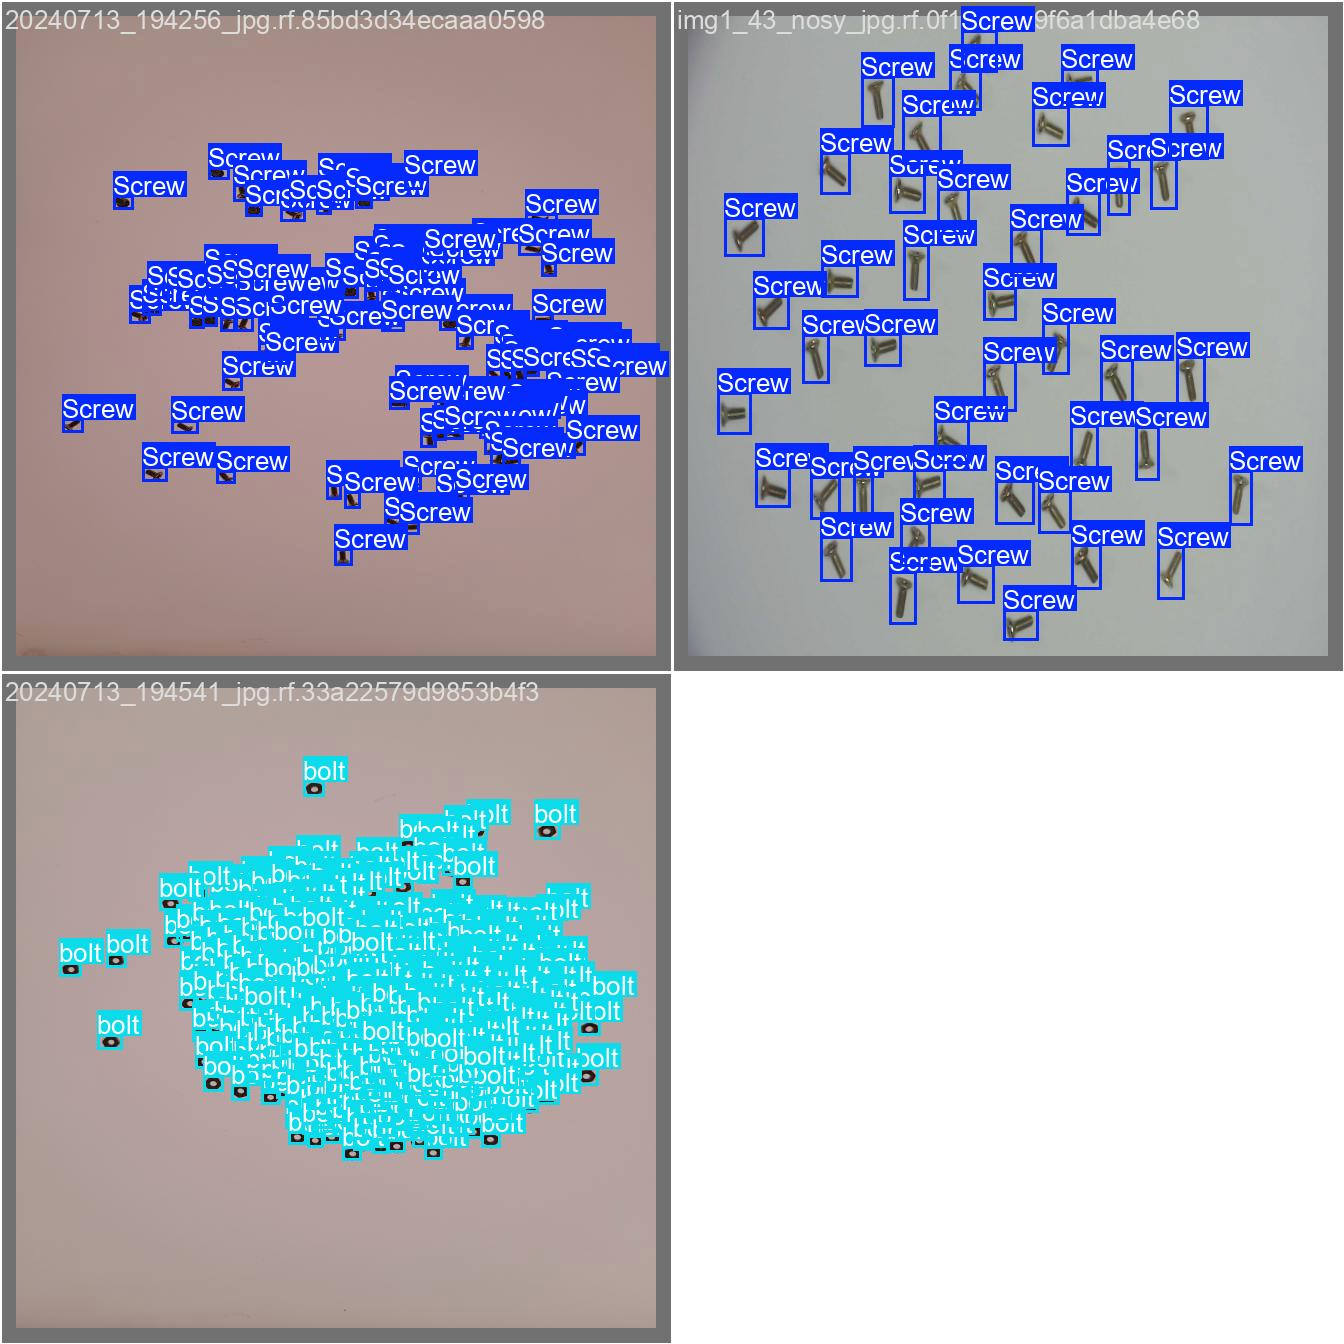

In [ ]:
Image(filename=f'/content/runs/detect/train/val_batch0_labels.jpg', width=600)

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/Screw-and-Bolt--3/data.yaml

Ultralytics YOLOv8.2.70 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/Screw-and-Bolt--3/valid/labels.cache... 3 images, 0 backgrounds, 0 corrupt: 100% 3/3 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  1.17it/s]
                   all          3        495      0.966      0.885      0.928       0.56
                 Screw          2        141      0.932      0.922      0.943      0.516
                  bolt          1        354      0.999      0.847      0.913      0.605
Speed: 0.3ms preprocess, 40.9ms inference, 0.0ms loss, 184.1ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.70 source=/content/20240713_193907_jpg.rf.d401e6edefc0d2f36b9b242915dfbc69.jpg save=True

Ultralytics YOLOv8.2.70 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/20240713_193907_jpg.rf.d401e6edefc0d2f36b9b242915dfbc69.jpg: 640x640 176 Screws, 16.3ms
Speed: 2.5ms preprocess, 16.3ms inference, 937.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict6
💡 Learn more at https://docs.ultralytics.com/modes/predict


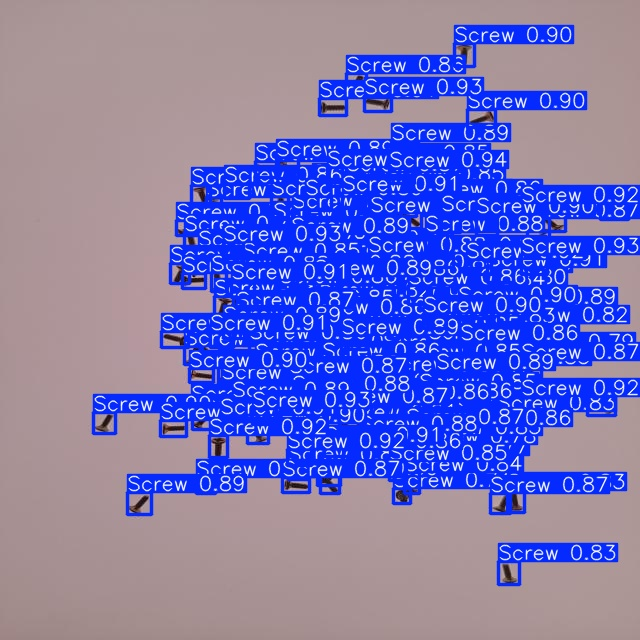

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict6/20240713_193907_jpg.rf.d401e6edefc0d2f36b9b242915dfbc69.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [1]:
!git clone https://github.com/AarohiSingla/Tracking-and-counting-Using-YOLOv8-and-DeepSORT.git

Cloning into 'Tracking-and-counting-Using-YOLOv8-and-DeepSORT'...
remote: Enumerating objects: 100, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 100 (delta 13), reused 3 (delta 0), pack-reused 73
Receiving objects: 100% (100/100), 51.25 MiB | 30.58 MiB/s, done.
Resolving deltas: 100% (18/18), done.


In [2]:
%cd /content/Tracking-and-counting-Using-YOLOv8-and-DeepSORT

/content/Tracking-and-counting-Using-YOLOv8-and-DeepSORT


In [ ]:
from ultralytics import YOLO

import time
import torch
import cv2
import torch.backends.cudnn as cudnn
from PIL import Image
import colorsys
import numpy as np

# Load a model
model = YOLO("/content/runs/detect/train/weights/best.pt")  # load a pretrained model (recommended for training)

results = model("/content/20240713_193907_jpg.rf.d401e6edefc0d2f36b9b242915dfbc69.jpg", save=True)



class_names = ['Screw','bolt']

for result in results:
    boxes = result.boxes  # Boxes object for bbox outputs
    probs = result.probs  # Class probabilities for classification outputs
    cls = boxes.cls.tolist()  # Convert tensor to list
    xyxy = boxes.xyxy
    xywh = boxes.xywh  # box with xywh format, (N, 4)
    conf = boxes.conf
    print(cls)
    for class_index in cls:
        class_name = class_names[int(class_index)]
        print("Class:", class_name)


image 1/1 /content/20240713_193907_jpg.rf.d401e6edefc0d2f36b9b242915dfbc69.jpg: 640x640 266 Screws, 16.3ms
Speed: 1.7ms preprocess, 16.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict7
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

In [3]:
from deep_sort.utils.parser import get_config
from deep_sort.deep_sort import DeepSort
from deep_sort.sort.tracker import Tracker

deep_sort_weights = 'deep_sort/deep/checkpoint/ckpt.t7'
tracker = DeepSort(model_path=deep_sort_weights, max_age=70)

In [10]:
from ultralytics import YOLO
import cv2
import os
import numpy as np
import time
from deep_sort.deep_sort import DeepSort

# Load YOLO model
model = YOLO("/content/best.pt")  # Load your custom trained model for screws and bolts

# Define class names for screws and bolts
class_names = ['Screw', 'Bolt']

# Deep SORT setup
deep_sort_weights = 'deep_sort/deep/checkpoint/ckpt.t7'
tracker = DeepSort(model_path=deep_sort_weights, max_age=70)

# Directories
image_directory = '/content/images'
output_directory = '/content/Screw-and-Bolt--3/annotated'

# Ensure output directory exists
os.makedirs(output_directory, exist_ok=True)

# Get list of image filenames
image_filenames = sorted(os.listdir(image_directory))

# Initialize variables for counting and FPS calculation
unique_track_ids = set()
frames = []
counter, fps, elapsed = 0, 0, 0
start_time = time.perf_counter()

# Process each image
for filename in image_filenames:
    # Load image
    image_path = os.path.join(image_directory, filename)
    frame = cv2.imread(image_path)

    if frame is not None:
        og_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frame = og_frame.copy()

        # Perform detection with YOLO
        results = model(frame)

        for result in results:
            boxes = result.boxes  # Boxes object for bbox outputs
            cls = boxes.cls.tolist()  # Convert tensor to list
            xyxy = boxes.xyxy
            conf = boxes.conf
            xywh = boxes.xywh  # box with xywh format, (N, 4)

        pred_cls = np.array(cls)
        conf = conf.detach().cpu().numpy()
        xyxy = xyxy.detach().cpu().numpy()
        bboxes_xywh = xywh
        bboxes_xywh = xywh.cpu().numpy()
        bboxes_xywh = np.array(bboxes_xywh, dtype=float)

        tracks = tracker.update(bboxes_xywh, conf, og_frame)

        for track in tracker.tracker.tracks:
            track_id = track.track_id
            x1, y1, x2, y2 = track.to_tlbr()  # Get bounding box coordinates in (x1, y1, x2, y2) format
            w = x2 - x1  # Calculate width
            h = y2 - y1  # Calculate height

            # Set color values for red, blue, and green
            red_color = (0, 0, 255)  # (B, G, R)
            blue_color = (255, 0, 0)  # (B, G, R)
            green_color = (0, 255, 0)  # (B, G, R)

            # Determine color based on track_id
            color_id = track_id % 3
            if color_id == 0:
                color = red_color
            elif color_id == 1:
                color = blue_color
            else:
                color = green_color

            cv2.rectangle(og_frame, (int(x1), int(y1)), (int(x1 + w), int(y1 + h)), color, 2)

            text_color = (0, 0, 0)  # Black color for text
            class_name = class_names[int(cls[0])] if cls else 'Unknown'
            cv2.putText(og_frame, f"{class_name}-{track_id}", (int(x1) + 10, int(y1) - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, text_color, 1, cv2.LINE_AA)

            # Add the track_id to the set of unique track IDs
            unique_track_ids.add(track_id)

        # Update the object count based on the number of unique track IDs
        object_count = len(unique_track_ids)

        # Update FPS and place on frame
        current_time = time.perf_counter()
        elapsed = (current_time - start_time)
        counter += 1
        if elapsed > 1:
            fps = counter / elapsed
            counter = 0
            start_time = current_time

        # Draw object count on frame
        cv2.putText(og_frame, f"Object Count: {object_count}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        # Save the annotated image
        output_path = os.path.join(output_directory, filename)
        cv2.imwrite(output_path, cv2.cvtColor(og_frame, cv2.COLOR_RGB2BGR))

print("Processing complete. Annotated images saved.")



0: 640x640 300 bolts, 842.7ms
Speed: 12.5ms preprocess, 842.7ms inference, 39.0ms postprocess per image at shape (1, 3, 640, 640)
Processing complete. Annotated images saved.
